In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
from sharkfin.expectations import *
from sharkfin.population import *
from sharkfin.markets import *
from sharkfin.simulation import *
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from HARK.core import AgentType
from HARK.ConsumptionSaving.ConsPortfolioModel import SequentialPortfolioConsumerType
from simulate.parameters import (
    agent_population_params,
    approx_params,
    continuous_dist_params,
)

parameter_dict = agent_population_params | continuous_dist_params
parameter_dict["AgentCount"] = 1

def build_population(agent_type : AgentType, parameters : dict, dphm = 1500):
    pop = AgentPopulation(agent_type(), parameters, dollars_per_hark_money_unit = dphm)
    pop.approx_distributions(approx_params)
    pop.parse_params()

    pop.create_distributed_agents()
    pop.create_database()
    pop.solve_distributed_agents()

    pop.solve(merge_by=["RiskyAvg", "RiskyStd"])

    # initialize population model
    pop.init_simulation()
    
    return pop

In [3]:
def run_simulation(
    agent_parameters,
    a=None,
    q=None,
    r= None,
    fm=None,
    market=None,
    dphm=1500,
    days_per_quarter=None
):
    #initialize population
    pop = build_population(SequentialPortfolioConsumerType, agent_parameters, dphm = dphm)
    
    market = MockMarket()
    
    #initialize the financial Fodel
    Fm = FinanceModel
    
    #initialize population model
    pop.init_simulation()
    
    attsim = AttentionSimulation(
        pop, Fm, a=a, q=q, r=r, market=market, days_per_quarter = days_per_quarter
    )
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [4]:
sim, sim_stats = run_simulation(
    parameter_dict,
    a=0.2,
    q=4,
    #r = 10,
    days_per_quarter = 60,
    dphm=10500
)

/home/sb/.local/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sb/.local/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/sb/.local/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Q-0
run_market, buy_sell: (275, 0)
price: 100.5693292621731
run_market, buy_sell: (149, 39)
price: 99.59111849469556
run_market, buy_sell: (556, 165)
price: 98.77886856684405
run_market, buy_sell: (455, 269)
price: 98.94561700635913
run_market, buy_sell: (342, 56)
price: 100.7497415008342
run_market, buy_sell: (657, 115)
price: 101.46175170550516
run_market, buy_sell: (313, 65)
price: 104.53881618946157
run_market, buy_sell: (475, 35)
price: 103.54452910873007
run_market, buy_sell: (362, 87)
price: 102.89159673352385
run_market, buy_sell: (348, 175)
price: 102.49531779445246
run_market, buy_sell: (824, 56)
price: 100.06251810853091
run_market, buy_sell: (239, 405)
price: 100.09089389324166
run_market, buy_sell: (67, 213)
price: 100.38564129254279
run_market, buy_sell: (447, 170)
price: 99.51696650018366
run_market, buy_sell: (162, 241)
price: 99.28184138795343
run_market, buy_sell: (237, 384)
price: 101.29272970172819
run_market, buy_sell: (287, 139)
price: 99.65517391694812
run_market

run_market, buy_sell: (790, 512)
price: 119.98561272461828
run_market, buy_sell: (644, 340)
price: 121.78189546177758
run_market, buy_sell: (72, 479)
price: 121.51813246998799
run_market, buy_sell: (890, 0)
price: 122.2810846095838
run_market, buy_sell: (483, 242)
price: 120.987494251795
run_market, buy_sell: (643, 148)
price: 122.86672787230239
run_market, buy_sell: (2, 556)
price: 123.95051108616371
run_market, buy_sell: (48, 549)
price: 122.79707244938467
run_market, buy_sell: (552, 116)
price: 122.31657156124686
run_market, buy_sell: (126, 26)
price: 121.68901797396433
run_market, buy_sell: (525, 6)
price: 119.92074595188458
run_market, buy_sell: (1245, 3230)
price: 118.57281500606734
run_market, buy_sell: (905, 2470)
price: 119.29136734264485
run_market, buy_sell: (268, 1359)
price: 120.35408549889276
run_market, buy_sell: (0, 208)
price: 120.28139010836392
run_market, buy_sell: (1510, 245)
price: 120.63914557903995
run_market, buy_sell: (503, 602)
price: 123.39588759714114
run_ma

In [5]:
data = sim.data()

In [6]:
data

,t,prices,buy,sell,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,100.569329,275,0,0,0,6033.345075,7.396135e+05,28272.236537,46305.655420,0.084471,0.006531,8.502582e-04,0.011812
1,1,99.591118,149,39,0,39,6119.059315,7.216822e+05,27375.555234,49658.500982,0.203161,-0.008902,4.721807e-04,0.011738
2,2,98.778869,556,165,0,63,6433.748745,7.062440e+05,26568.169029,52768.954134,0.219906,-0.007329,1.701819e-04,0.011602
3,3,98.945617,455,269,0,140,6759.323513,7.035944e+05,26307.250349,18786.413156,0.207501,0.002523,2.717060e-04,0.011389
4,4,100.749742,342,56,0,0,7045.220990,7.168964e+05,26307.250349,0.000000,0.207501,0.019082,1.039099e-03,0.011764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,120.611913,1392,523,0,0,15394.263913,1.156574e+06,47804.947790,32090.080036,0.748361,-0.000920,-1.177324e-04,0.012055
236,236,120.690813,1865,167,0,110,17203.024574,1.159661e+06,47804.947790,0.000000,0.748361,0.001488,8.939766e-07,0.011609
237,237,120.363617,253,82,0,0,17330.008673,1.145571e+06,47325.434616,37422.379373,0.752305,-0.001880,-1.380480e-04,0.011182
238,238,120.200462,1241,57,0,43,18557.290939,1.144402e+06,47325.434616,0.000000,0.752305,-0.000523,-1.665057e-04,0.010762


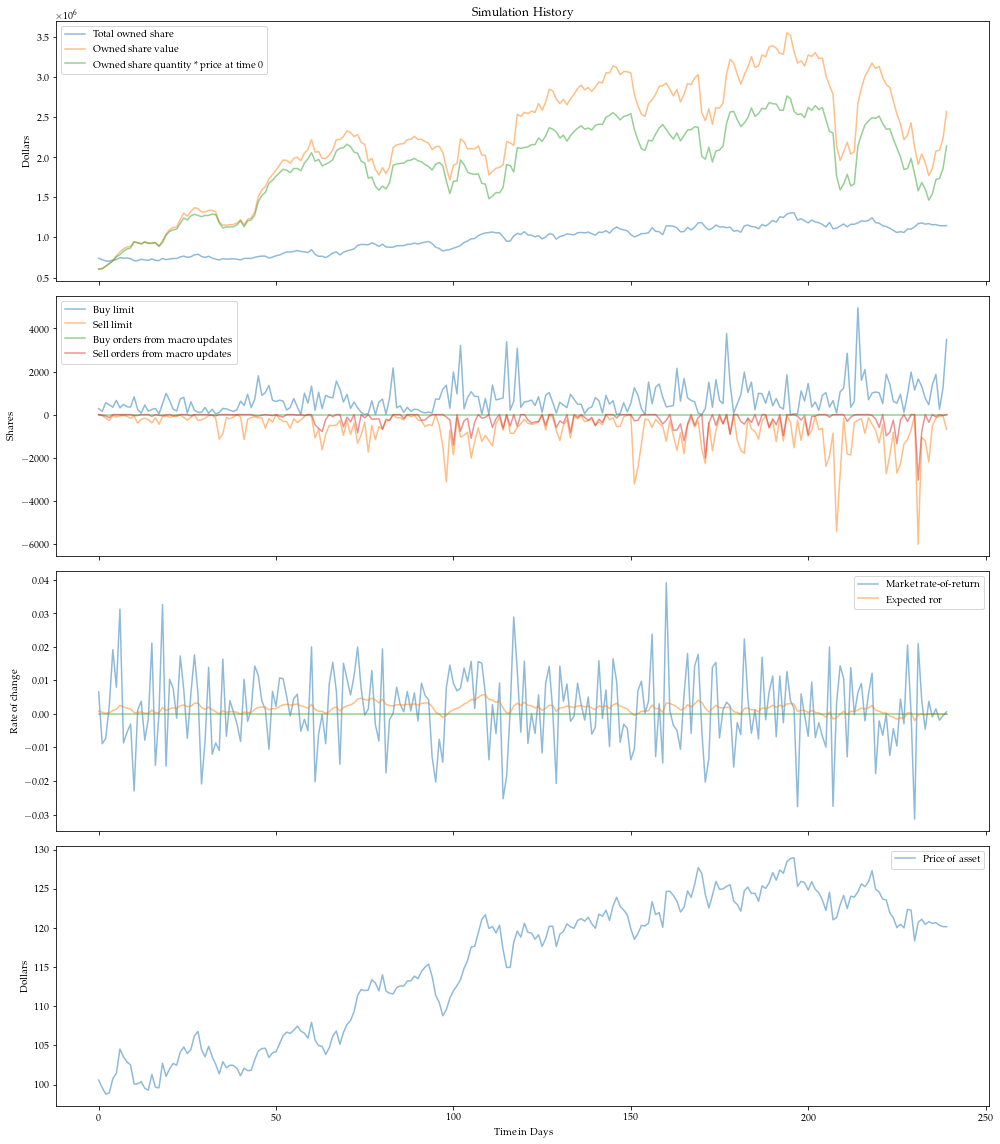

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(-data['sell'], alpha=0.5, label='Sell limit')
ax[1].plot(data['buy_macro'], alpha=0.5, label='Buy orders from macro updates')
ax[1].plot(-data['sell_macro'], alpha=0.5, label='Sell orders from macro updates')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()



In [8]:
sim.days_per_quarter

60

In [9]:
sim.market.prices

[100,
 100.5693292621731,
 99.59111849469556,
 98.77886856684405,
 98.94561700635913,
 100.7497415008342,
 101.46175170550516,
 104.53881618946157,
 103.54452910873007,
 102.89159673352385,
 102.49531779445246,
 100.06251810853091,
 100.09089389324166,
 100.38564129254279,
 99.51696650018366,
 99.28184138795343,
 101.29272970172819,
 99.65517391694812,
 99.57682600634931,
 102.73201403656432,
 101.04416531982932,
 102.00075444212945,
 102.69362640380693,
 102.4761195577542,
 104.15798685703574,
 104.80693712489665,
 103.95750273888753,
 104.49545438349904,
 106.243912704191,
 106.79194116069287,
 104.47635355812847,
 103.54838690788341,
 104.8955027467425,
 103.54917873442497,
 102.56679579674345,
 101.36152754712515,
 102.92996122166352,
 102.15481355214602,
 102.47543798800905,
 102.44756617876314,
 102.05327586948407,
 101.13020062990265,
 102.08544461387915,
 101.77382209951509,
 101.82331338003287,
 103.18900178829445,
 104.28521869131637,
 104.59929384403203,
 104.64356522262872,

In [10]:
sim.market.dividends

[0.08333333333333333,
 0.08380777438514425,
 0.08299259874557964,
 0.08231572380570337,
 0.08245468083863261,
 0.08395811791736184,
 0.08455145975458764,
 0.08711568015788464,
 0.0862871075906084,
 0.08574299727793655,
 0.08541276482871038,
 0.0833854317571091,
 0.08340907824436805,
 0.08365470107711899,
 0.08293080541681971,
 0.08273486782329453,
 0.08441060808477349,
 0.08304597826412342,
 0.08298068833862442,
 0.08561001169713693,
 0.08420347109985776,
 0.08500062870177454,
 0.08557802200317244,
 0.08539676629812851,
 0.08679832238086312,
 0.08733911427074721,
 0.08663125228240627,
 0.08707954531958254,
 0.08853659392015917,
 0.08899328430057739,
 0.08706362796510705,
 0.08629032242323617,
 0.08741291895561874,
 0.08629098227868748,
 0.08547232983061955,
 0.0844679396226043,
 0.0857749676847196,
 0.08512901129345501,
 0.08539619832334087,
 0.08537297181563595,
 0.08504439655790338,
 0.08427516719158554,
 0.08507120384489929,
 0.08481151841626257,
 0.08485276115002739,
 0.08599083482

In [11]:
[sim.market.prices[i] / sim.market.dividends[i] for i in range(1, len(sim.market.prices))]

[1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 

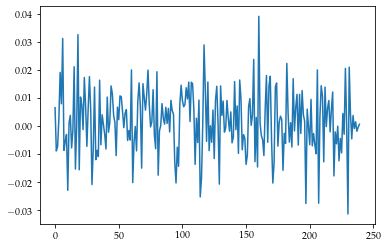

In [12]:
plt.plot(sim.market.ror_list())

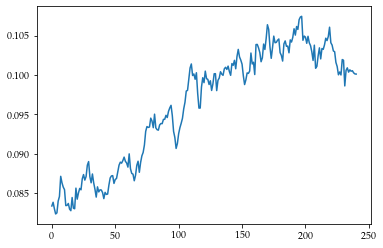

In [13]:
plt.plot(sim.market.dividends)

In [14]:
sim.market.next_dividend()

0.1009043685726209

In [15]:
sim.market.dividends[-1]

0.10014613567584595

In [18]:
mean([sim.market.next_dividend() / sim.market.dividends[-1] for i in range(1000000)])

1.0006356547926312